<a href="https://colab.research.google.com/github/anyexhyde/sudoku/blob/main/Global%20average%20land%20tempterature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We are Mary, Anyelina, and Winnie presenting:

Predictions on global average land temperature given a dataset based on average land and ocean temperatures recorded between 1750 to 2020. We aim to provide a world and regional visualization of global warming in the last few centuries. We will also use machine learning on other features (e.g. hectares of arable land, manufacturing, and CO2 emissions) to predict average temperatures.


# **Setting up the notebook & downloading datasets**
Please go to the [drive](https://drive.google.com/drive/folders/1aEu4lC6cuzdNSBb-WLsTvFvnDp-k6d2c?usp=sharing) and download the following csv files, and upload it onto Colab in the "Files" tab.
*   arable_land_hectares.csv
*   greenhouse_co2.csv
*   manufacturing.csv

This notebook also requires the use of a Kaggle API key. You can view the directions on how to make a key here: https://www.kaggle.com/docs/api

To set up Kaggle on this notebook, one cell will prompt you to upload a `kaggle.json` file.



In [ ]:
#imports
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt

Below, we use the Kaggle API to get our datasets.

In [ ]:
! pip uninstall kaggle #get new kaggle
! pip install kaggle

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.7/dist-packages/kaggle-1.5.12.dist-info/*
    /usr/local/lib/python3.7/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 58 kB 3.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=a1b8012c9931cf7fa4289b0969635357067ba82fca0254827e2556f7cb855c23
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle


In [ ]:
from google.colab import files

`files.upload()` takes in `kaggle.json` (created when you make an API key with your Kaggle account.)

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"winniedong","key":"a3b63c66cb180d38ab43b9cc3ae06bc7"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

 90% 76.0M/84.7M [00:00<00:00, 155MB/s]
100% 84.7M/84.7M [00:00<00:00, 133MB/s]


Since the dataset download is a .zip file, we unzip it below and put it into a folder called temperature_files.

In [ ]:
!unzip "/content/climate-change-earth-surface-temperature-data.zip" -d "/content/temperature_files/"

Archive:  /content/climate-change-earth-surface-temperature-data.zip
  inflating: /content/temperature_files/GlobalLandTemperaturesByCity.csv  
  inflating: /content/temperature_files/GlobalLandTemperaturesByCountry.csv  
  inflating: /content/temperature_files/GlobalLandTemperaturesByMajorCity.csv  
  inflating: /content/temperature_files/GlobalLandTemperaturesByState.csv  
  inflating: /content/temperature_files/GlobalTemperatures.csv  


The dataset on international greenhouse gas emissions was ultimately not used in our analysis, but there is a section at the bottom of our notebook demonstrating what our linear regression exercise looked like with this dataset.

In [ ]:
! kaggle datasets download -d unitednations/international-greenhouse-gas-emissions

  0% 0.00/107k [00:00<?, ?B/s]
100% 107k/107k [00:00<00:00, 25.1MB/s]


In [ ]:
!unzip "/content/international-greenhouse-gas-emissions.zip" -d "/content/greenhouse_gas_files/"

Archive:  /content/international-greenhouse-gas-emissions.zip
  inflating: /content/greenhouse_gas_files/greenhouse_gas_inventory_data_data.csv  


# **EDA: global land temperatures by continent**

In this section, we are importing the country temperatures dataset, while also identifying the continents of each country in the dataset. In the next section, we will then attempt to visualize changes in average temperature for each continent and provide a visualization of the different effects of global warming on different regions in the world

In [ ]:
#import country temperatures dataset, located under temperature_files in the directory
country_temp_df = pd.read_csv('temperature_files/GlobalLandTemperaturesByCountry.csv')
country_temp_df = country_temp_df.dropna(subset=['AverageTemperature', 'Country', 'dt'])
country_temp_df = country_temp_df.sort_values(['dt', 'Country'], ascending=True).reset_index()
country_temp_df = country_temp_df.rename(columns={"dt": "Date"})
country_temp_df['AverageTemperature'] = country_temp_df['AverageTemperature'].astype(float)
country_temp_df['AverageTemperatureUncertainty'] = country_temp_df['AverageTemperatureUncertainty'].astype(float)
country_temp_df['Date'] = pd.to_datetime(country_temp_df['Date'], format='%Y/%m/%d')

In [ ]:
country_temp_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country
0,7310,1743-11-01,8.620,2.268,Albania
1,15031,1743-11-01,7.556,2.188,Andorra
2,36751,1743-11-01,2.482,2.116,Austria
3,54721,1743-11-01,0.767,2.465,Belarus
4,57960,1743-11-01,7.106,1.855,Belgium
...,...,...,...,...,...
544806,422265,2013-09-01,28.048,0.974,Puerto Rico
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands
544809,557820,2013-09-01,18.273,1.210,United States


In [ ]:
#isolate the temperatures by month (season), as countries have different seasons depending on their distance to the equator
country_temp_df['month'] = pd.DatetimeIndex(country_temp_df['Date']).month
country_temp_df['year'] = pd.DatetimeIndex(country_temp_df['Date']).year
country_temp_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
0,7310,1743-11-01,8.620,2.268,Albania,11,1743
1,15031,1743-11-01,7.556,2.188,Andorra,11,1743
2,36751,1743-11-01,2.482,2.116,Austria,11,1743
3,54721,1743-11-01,0.767,2.465,Belarus,11,1743
4,57960,1743-11-01,7.106,1.855,Belgium,11,1743
...,...,...,...,...,...,...,...
544806,422265,2013-09-01,28.048,0.974,Puerto Rico,9,2013
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,9,2013
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands,9,2013
544809,557820,2013-09-01,18.273,1.210,United States,9,2013


## **Attempt 1 for visualizing continent average temperatures**

Below, we attempt to create our own function that converts a country to a continent using pycountry-convert. However, this was not the most efficient process since there were already columns in the dataset that already had the continents' average temperatures over time, as seen below.

One line of code has been deliberately commented out due to it significantly increasing the runtime.

In [ ]:
country_temp_df[country_temp_df['Country'] == 'Europe']

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
11,166364,1743-11-01,3.942,1.898,Europe,11,1743
61,166369,1744-04-01,8.249,2.562,Europe,4,1744
111,166370,1744-05-01,11.030,1.702,Europe,5,1744
161,166371,1744-06-01,15.209,1.693,Europe,6,1744
211,166372,1744-07-01,17.498,1.703,Europe,7,1744
...,...,...,...,...,...,...,...
543649,169597,2013-04-01,7.810,0.262,Europe,4,2013
543891,169598,2013-05-01,13.466,0.162,Europe,5,2013
544133,169599,2013-06-01,17.096,0.239,Europe,6,2013
544375,169600,2013-07-01,19.585,0.210,Europe,7,2013


In [ ]:
country_temp_df[country_temp_df['Country'] == 'North America']

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
12000,382604,1768-09-01,9.761,2.719,North America,9,1768
12058,382605,1768-10-01,2.256,2.954,North America,10,1768
12116,382606,1768-11-01,-4.919,3.595,North America,11,1768
12174,382607,1768-12-01,-10.165,4.566,North America,12,1768
12232,382608,1769-01-01,-12.370,4.363,North America,1,1769
...,...,...,...,...,...,...,...
543980,385540,2013-05-01,8.388,0.207,North America,5,2013
544222,385541,2013-06-01,14.954,0.237,North America,6,2013
544464,385542,2013-07-01,16.840,0.257,North America,7,2013
544706,385543,2013-08-01,15.931,0.203,North America,8,2013


In [ ]:
! pip install pycountry-convert

     |████████████████████████████████| 10.1 MB 11.4 MB/s 
     |████████████████████████████████| 280 kB 23.7 MB/s 
     |████████████████████████████████| 213 kB 39.5 MB/s 
     |████████████████████████████████| 280 kB 28.2 MB/s 
     |████████████████████████████████| 280 kB 44.4 MB/s 
     |████████████████████████████████| 280 kB 38.3 MB/s 
     |████████████████████████████████| 279 kB 20.6 MB/s 
     |████████████████████████████████| 279 kB 38.6 MB/s 
     |████████████████████████████████| 272 kB 30.1 MB/s 
     |████████████████████████████████| 272 kB 26.3 MB/s 
     |████████████████████████████████| 272 kB 11.8 MB/s 
     |████████████████████████████████| 270 kB 41.0 MB/s 
     |████████████████████████████████| 270 kB 44.7 MB/s 
     |████████████████████████████████| 270 kB 37.0 MB/s 
     |████████████████████████████████| 248 kB 35.7 MB/s 
     |████████████████████████████████| 247 kB 43.6 MB/s 
     |████████████████████████████████| 246 kB 43.1 MB/s 
     |███████

In [ ]:
import pycountry_convert as pc
import pycountry
import re

In [ ]:
# the below function has a very long run time due to the .search_fuzzy

In [ ]:
def country_to_continent(country):
  cleaned_country = re.sub(r"\([^()]*\)", "", country) # removing countries who might have parentheses, like Denmark (Europe)
  try: 
    # fuzzy search significantly increased the runtime
    # .search_fuzzy was used since several countries, when going from country name to alpha2, had an exception and
    # were classified as "None"
    # proper_country = pycountry.countries.search_fuzzy(cleaned_country)[0].name 
    country_code = pc.country_name_to_country_alpha2(cleaned_country, cn_name_format="default")
    continent_name = pc.country_alpha2_to_continent_code(country_code)
    return continent_name
  except:
    return None

Below, a new dataframe was used to examine how many rows a subset of the dataframe had to see if running the function could be feasible by slicing our original dataframe.

In [ ]:
recent_df = country_temp_df.loc[country_temp_df["year"]> 2010]

In [ ]:
country_temp_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
0,7310,1743-11-01,8.620,2.268,Albania,11,1743
1,15031,1743-11-01,7.556,2.188,Andorra,11,1743
2,36751,1743-11-01,2.482,2.116,Austria,11,1743
3,54721,1743-11-01,0.767,2.465,Belarus,11,1743
4,57960,1743-11-01,7.106,1.855,Belgium,11,1743
...,...,...,...,...,...,...,...
544806,422265,2013-09-01,28.048,0.974,Puerto Rico,9,2013
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,9,2013
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands,9,2013
544809,557820,2013-09-01,18.273,1.210,United States,9,2013


In [ ]:
recent_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
537046,5312,2011-01-01,1.827,0.293,Afghanistan,1,2011
537047,7277,2011-01-01,21.389,0.226,Africa,1,2011
537048,10516,2011-01-01,3.788,0.543,Albania,1,2011
537049,13237,2011-01-01,14.015,0.353,Algeria,1,2011
537050,14998,2011-01-01,26.359,0.546,American Samoa,1,2011
...,...,...,...,...,...,...,...
544806,422265,2013-09-01,28.048,0.974,Puerto Rico,9,2013
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,9,2013
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands,9,2013
544809,557820,2013-09-01,18.273,1.210,United States,9,2013


7765 rows for years 2011-2013! If we were to use our `country_to_continent` function for all of the years, there would be 544811 rows where `pycountry.countries.search_fuzzy` would have to be used, making our function computationally expensive. 

In [ ]:
country_temp_df['Continent'] = country_temp_df['Country'].apply(lambda x: country_to_continent(x))

In [ ]:
country_temp_df[country_temp_df['Continent'].isna()]
# 89947/544811 = 0.165 of the data would be dropped. Note that column 544805 already has North America in the "Country"
# column, which hinted to us that there were actually continent data already available.

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent
5,71990,1743-11-01,6.391,2.391,Bosnia And Herzegovina,11,1743,None
9,139254,1743-11-01,6.507,1.767,Denmark (Europe),11,1743,None
11,166364,1743-11-01,3.942,1.898,Europe,11,1743,None
15,181114,1743-11-01,7.397,2.097,France (Europe),11,1743,None
22,256269,1743-11-01,9.623,1.870,Isle Of Man,11,1743,None
...,...,...,...,...,...,...,...,...
544789,3237,2013-08-01,16.425,0.378,Åland,8,2013,None
544805,385544,2013-09-01,12.429,1.308,North America,9,2013,None
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,9,2013,None
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands,9,2013,None


## **Visualizing average temperatures per continent over time**

Below, we filter `country_temp_df` to certain continents to visualize their average temperature over time. 

### Europe

In [ ]:
europe_df = country_temp_df[country_temp_df['Country'] == 'Europe'].groupby('year').mean()

In [ ]:
europe_df.reset_index(inplace=True)

In [ ]:
europe_df

,year,index,AverageTemperature,AverageTemperatureUncertainty,month
0,1743,166364.000000,3.942000,1.898000,11.000000
1,1744,166373.000000,9.395375,1.845625,8.000000
2,1745,166379.500000,0.274750,1.709500,2.500000
3,1750,166443.090909,8.590636,1.805909,6.090909
4,1751,166454.000000,8.684375,1.747250,5.000000
...,...,...,...,...,...
262,2009,169551.500000,9.150333,0.195500,6.500000
263,2010,169563.500000,8.279833,0.193167,6.500000
264,2011,169575.500000,9.384417,0.202333,6.500000
265,2012,169587.500000,8.912917,0.251833,6.500000


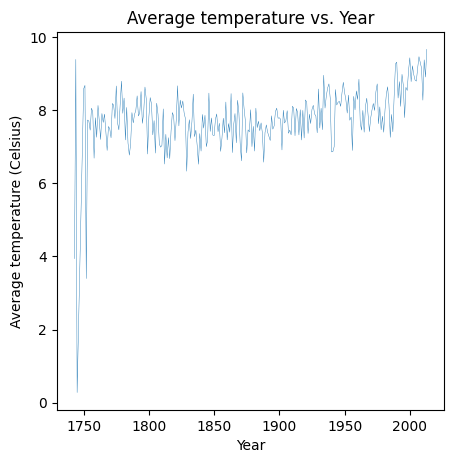

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(5,5), dpi=100)
plt.plot(europe_df['year'], europe_df['AverageTemperature'], linewidth=.3)
plt.xlabel("Year")
plt.ylabel("Average temperature (Celsius)")
plt.title("Average temperature vs. Year")
plt.show()

Note that starting from ~1975, there is a general increase in average temperature.

### Asia

In [ ]:
asia_df = country_temp_df[country_temp_df['Country'] == 'Asia'].groupby('year').mean()
asia_df.reset_index(inplace=True)

In [ ]:
asia_df

,year,index,AverageTemperature,AverageTemperatureUncertainty,month
0,1816,32450.000000,9.547556,2.474667,8.000000
1,1817,32460.500000,5.945500,2.209500,6.500000
2,1818,32472.818182,7.336091,2.514455,6.818182
3,1819,32484.636364,5.487545,2.102000,6.636364
4,1820,32497.000000,7.830091,1.791091,7.000000
...,...,...,...,...,...
193,2009,34764.500000,8.442333,0.152917,6.500000
194,2010,34776.500000,8.575583,0.141833,6.500000
195,2011,34788.500000,8.574000,0.163583,6.500000
196,2012,34800.500000,8.429333,0.192417,6.500000


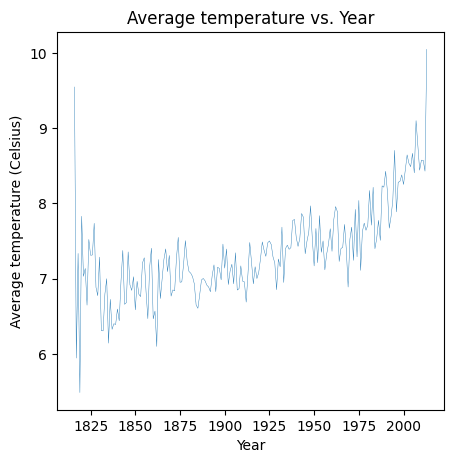

In [ ]:
figure(figsize=(5,5), dpi=100)
plt.plot(asia_df['year'], asia_df['AverageTemperature'], linewidth=.3)
plt.xlabel("Year")
plt.ylabel("Average temperature (Celsius)")
plt.title("Average temperature vs. Year")
plt.show()

### North America

In [ ]:
nam_df = country_temp_df[country_temp_df['Country'] == 'North America'].groupby('year').mean()
nam_df.reset_index(inplace=True)
nam_df

,year,index,AverageTemperature,AverageTemperatureUncertainty,month
0,1768,382605.500000,-0.766750,3.458500,10.500000
1,1769,382611.500000,3.839500,3.366000,4.500000
2,1774,382678.000000,-5.092667,3.427000,11.000000
3,1775,382685.500000,2.970333,2.553417,6.500000
4,1776,382697.636364,1.449364,2.766091,6.636364
...,...,...,...,...,...
210,2009,385493.500000,2.925083,0.165333,6.500000
211,2010,385505.500000,4.073250,0.172500,6.500000
212,2011,385517.500000,3.332833,0.174583,6.500000
213,2012,385529.500000,3.805750,0.237167,6.500000


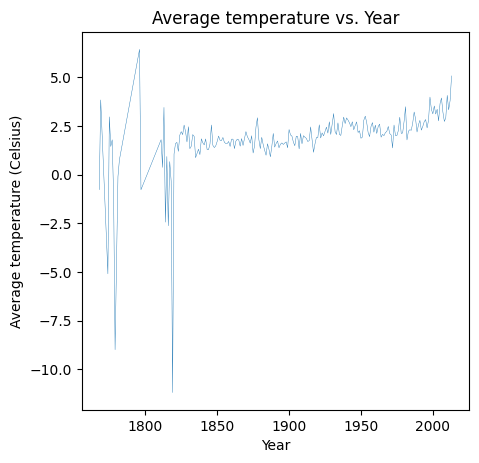

In [ ]:
figure(figsize=(5,5), dpi=100)
plt.plot(nam_df['year'], nam_df['AverageTemperature'], linewidth=.3)
plt.xlabel("Year")
plt.ylabel("Average temperature (Celsius)")
plt.title("Average temperature vs. Year")
plt.show()

### South America

In [ ]:
sam_df = country_temp_df[country_temp_df['Country'] == 'South America'].groupby('year').mean()
sam_df.reset_index(inplace=True)
sam_df

,year,index,AverageTemperature,AverageTemperatureUncertainty,month
0,1851,484773.5,21.415833,1.156750,6.5
1,1852,484785.5,21.373167,1.090000,6.5
2,1853,484797.5,21.379500,0.990167,6.5
3,1854,484809.5,21.496750,1.072333,6.5
4,1855,484821.5,21.461667,1.028083,6.5
...,...,...,...,...,...
158,2009,486669.5,22.652583,0.171917,6.5
159,2010,486681.5,22.677333,0.162750,6.5
160,2011,486693.5,22.473000,0.183250,6.5
161,2012,486705.5,22.722583,0.218167,6.5


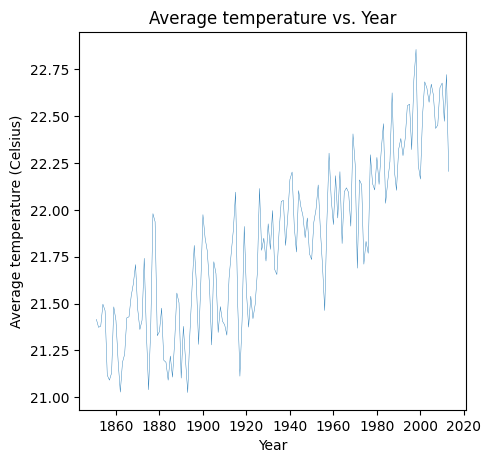

In [ ]:
figure(figsize=(5,5), dpi=100)
plt.plot(sam_df['year'], sam_df['AverageTemperature'], linewidth=.3)
plt.xlabel("Year")
plt.ylabel("Average temperature (Celsius)")
plt.title("Average temperature vs. Year")
plt.show()

# **EDA: global temperatures**
Below, we:
*   Download a csv on global temperatures over time, defined as `global_df`
*   Group by the year to have a cleaner visualization of average global temperature over time
* Explore reasons behind why the average temperature in earlier years (before 1850) have such variable average temperature. We conclude that it is likely because not every year had average temperature data per month, therefore pushing the data below or above its actual average temperature. Additionally, greater reprsentation of countries in the Northern Hemisphere contribute to average temperatures in the 18th century to be lower, and also explains why earlier years have greater temperature uncertainty, which is a column in our dataframe.



In [ ]:
global_df = pd.read_csv('temperature_files/GlobalTemperatures.csv')

In [ ]:
# since dt is an object, we will convert it to type datetime to extract the year
global_df = global_df.rename(columns={"dt": "Date"})
global_df['Date'] = pd.to_datetime(global_df['Date'], format='%Y/%m/%d')

In [ ]:
# creating new columns for year and month
global_df['month'] = pd.DatetimeIndex(global_df['Date']).month
global_df['year'] = pd.DatetimeIndex(global_df['Date']).year

In [ ]:
global_df

,Date,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month,year
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,2,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,3,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,4,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,5,1750
...,...,...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,8,2015
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,9,2015
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,10,2015
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,11,2015


In [ ]:
global_df_yr = global_df.groupby(by="year").mean().reset_index()

In [ ]:
global_df_yr

,year,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,month
0,1750,8.719364,2.637818,NaN,NaN,NaN,NaN,NaN,NaN,6.5
1,1751,7.976143,2.781143,NaN,NaN,NaN,NaN,NaN,NaN,6.5
2,1752,5.779833,2.977000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
3,1753,8.388083,3.176000,NaN,NaN,NaN,NaN,NaN,NaN,6.5
4,1754,8.469333,3.494250,NaN,NaN,NaN,NaN,NaN,NaN,6.5
...,...,...,...,...,...,...,...,...,...,...
261,2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,6.5
262,2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,6.5
263,2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,6.5
264,2014,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167,6.5


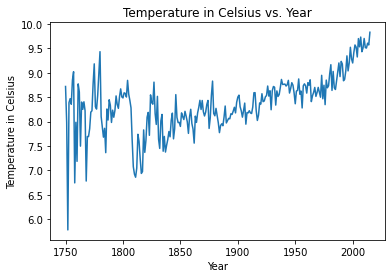

In [ ]:
# let's plot how average global temperature has changed from 1750 to 2015

plt.plot(global_df_yr['year'], global_df_yr['LandAverageTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature in Celsius")
plt.title("Temperature in Celsius vs. Year")
plt.show()

Observations: We see that starting from 1960 to the present, the average tmperature appears to increase at a faster rate. 

There is a noticable dip in 1752 where the average land temperature was 5.78 degrees, compared to 1751 with average temperature of 7.98 degrees and 1753 with average temperature of 8.39 degrees.

Below, we try to see if this dip is potentially due to data collection. There is a possiblity that with fewer samples in one year, it skews the mean, or that historically colder countries has greater representation in the dataset.

### Exploring dips in average temperature

Note that some months are not present, which indicates that an average annual temperature is likely not accurate in earlier months

In [ ]:
country_temp_counts = country_temp_df.groupby(['year','month']).mean().reset_index()
country_temp_counts[0:15]

,year,month,index,AverageTemperature,AverageTemperatureUncertainty
0,1743,11,277579.32,5.18414,2.18352
1,1744,4,277584.32,8.66148,2.80144
2,1744,5,277585.32,11.09836,1.99444
3,1744,6,277586.32,14.92772,2.02006
4,1744,7,277587.32,17.09430,2.02156
5,1744,9,277589.32,13.32412,2.05672
6,1744,10,277590.32,8.27664,2.10512
7,1744,11,277591.32,4.75952,1.97060
8,1744,12,277592.32,0.56104,2.12048
9,1745,1,277593.32,-1.77778,2.11554


Only January, March, April, October, November, and December are represented in 1752, and most of the countries reprsented are in the Northern Hemisphere, meaning that only historically cold months (Fall, Winter) are pulling the average annual temperature down.

In [ ]:
country_temp_df[country_temp_df['year'] == 1752].groupby('month').count()

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,year,Continent
month,,,,,,,
1,50,50,50,50,50,50,41
3,50,50,50,50,50,50,41
4,50,50,50,50,50,50,41
10,50,50,50,50,50,50,41
11,50,50,50,50,50,50,41
12,50,50,50,50,50,50,41


In [ ]:
country_temp_df[country_temp_df['year'] == 1752].groupby('Country').count()

,index,Date,AverageTemperature,AverageTemperatureUncertainty,month,year,Continent
Country,,,,,,,
Albania,6,6,6,6,6,6,6
Andorra,6,6,6,6,6,6,6
Austria,6,6,6,6,6,6,6
Belarus,6,6,6,6,6,6,6
Belgium,6,6,6,6,6,6,6
Bosnia And Herzegovina,6,6,6,6,6,6,0
Bulgaria,6,6,6,6,6,6,6
Croatia,6,6,6,6,6,6,6
Czech Republic,6,6,6,6,6,6,6


1753, which has a higher average temperature, has all months represented. Most of the countries are in the Northern Hemisphere, which means that the presence of summer/warmer temperatures pushes the average temperature up.

In [ ]:
country_temp_df[country_temp_df['year'] == 1753].groupby('month').count()

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,year,Continent
month,,,,,,,
1,53,53,53,53,53,53,44
2,53,53,53,53,53,53,44
3,53,53,53,53,53,53,44
4,53,53,53,53,53,53,44
5,53,53,53,53,53,53,44
6,53,53,53,53,53,53,44
7,53,53,53,53,53,53,44
8,53,53,53,53,53,53,44
9,53,53,53,53,53,53,44


In [ ]:
country_temp_df[country_temp_df['year'] == 1753].groupby('Country').count()

,index,Date,AverageTemperature,AverageTemperatureUncertainty,month,year,Continent
Country,,,,,,,
Albania,12,12,12,12,12,12,12
Andorra,12,12,12,12,12,12,12
Austria,12,12,12,12,12,12,12
Belarus,12,12,12,12,12,12,12
Belgium,12,12,12,12,12,12,12
Bosnia And Herzegovina,12,12,12,12,12,12,0
Bulgaria,12,12,12,12,12,12,12
Croatia,12,12,12,12,12,12,12
Czech Republic,12,12,12,12,12,12,12


In [ ]:
country_1700s = country_temp_df[country_temp_df['year'] < 1800]

In [ ]:
country_1700s

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent
0,7310,1743-11-01,8.620,2.268,Albania,11,1743,EU
1,15031,1743-11-01,7.556,2.188,Andorra,11,1743,EU
2,36751,1743-11-01,2.482,2.116,Austria,11,1743,EU
3,54721,1743-11-01,0.767,2.465,Belarus,11,1743,EU
4,57960,1743-11-01,7.106,1.855,Belgium,11,1743,EU
...,...,...,...,...,...,...,...,...
34127,533957,1799-12-01,1.452,2.558,Turkey,12,1799,AS
34128,543787,1799-12-01,-6.568,2.711,Ukraine,12,1799,EU
34129,552314,1799-12-01,1.606,1.749,United Kingdom,12,1799,EU
34130,549075,1799-12-01,1.223,1.723,United Kingdom (Europe),12,1799,None


From the plot below, we also observe that the low average temperatures in the 1700's are correlated with a higher average temperature uncertainty.

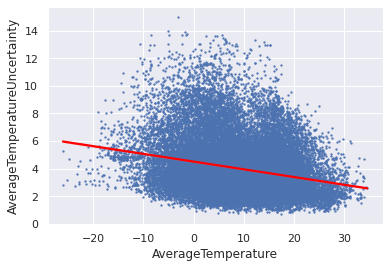

In [ ]:
#correlation plot for temperature uncertainty vs land temperature in the 1700's
import seaborn as sns
sns.set(color_codes=True)
ax = sns.regplot(x="AverageTemperature", y="AverageTemperatureUncertainty", data=country_1700s,line_kws={'color':'red'}, scatter_kws={'s':2})

# **Adding new features to dataset**

As we are working with a smaller dataframe than desired, we have decided not to perform PCA on our data due to the limited number of features. Our original country temperature dataframe contains few features that would help us make predictions (month, year, and country).  Therefore, we actively tried to find new features to add, such as arable land (hectares), manufacturing (% of GDP), and CO2 emissions (% of greenhouse gas emission).

# New feature: Arable Land

We will use Arable Land per country (in hectares) as an additional feature, and use its data starting from 1960 to predict average land temperature. An increase in arable land means clearing and deforestation for crops, all of which are contributors to climate change.

In [ ]:
#importing data with csv
#the formatting of the original data was funky--had to manually rearrange the column names onto the first row, or this wouldn't pass
arable_land_df = pd.read_csv('/content/arable_land_hectares.csv', error_bad_lines=False)
arable_land_df_nodrop = arable_land_df #this dataframe will be used in the following section (replacing nulls with average)
arable_land_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,NaN,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,NaN,NaN
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,NaN,7650000.0,7700000.0,7750000.0,7800000.0,7800000.0,7835000.0,7844000.0,7844000.0,7860000.0,7870000.0,7900000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7824000.0,7703000.0,7653000.0,7647000.0,7685000.0,7757000.0,7653000.0,7683000.0,7683000.0,7678000.0,7772000.0,7816000.0,7805000.0,7794000.0,7794000.0,7794000.0,7793000.0,7793000.0,7791000.0,7790000.0,7785000.0,7771000.0,7765000.0,7729000.0,7699000.0,7703000.0,NaN,NaN
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,NaN,2670000.0,2700000.0,2720000.0,2750000.0,2770000.0,2800000.0,2830000.0,2860000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2950000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3100000.0,3300000.0,3300000.0,3300000.0,3300000.0,3400000.0,3400000.0,4000000.0,4100000.0,4700000.0,4700000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,NaN,1262000.0,1273000.0,1285000.0,1295000.0,1305000.0,1310000.0,1317000.0,1322000.0,1327000.0,1332000.0,1340000.0,1345000.0,1350000.0,1355000.0,1363000.0,1363000.0,1363000.0,1365000.0,1366000.0,1366000.0,1368000.0,1368000.0,1368000.0,1368000.0,1372000.0,1372000.0,1376000.0,1376000.0,1378000.0,1523000.0,1528000.0,1378000.0,1622000.0,1627000.0,1633000.0,1647000.0,1607000.0,1564000.0,1547000.0,1545000.0,1466000.0,1415000.0,1252000.0,1325000.0,1287000.0,1374000.0,1365000.0,1245000.0,1171000.0,1291000.0,1161000.0,1204000.0,1201000.0,1153600.0,1137600.0,1095800.0,1097700.0,1097700.0,NaN,NaN
263,South Africa,ZAF,Arable la

In [ ]:
#we decided to drop data for the years 1960, 2019 and 2020 as all countries did not have data under those years

arable_land_df = arable_land_df.drop(columns=['1960', '2019', '2020'])
arable_land_df

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,7650000.0,7700000.0,7750000.0,7800000.0,7800000.0,7835000.0,7844000.0,7844000.0,7860000.0,7870000.0,7900000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7824000.0,7703000.0,7653000.0,7647000.0,7685000.0,7757000.0,7653000.0,7683000.0,7683000.0,7678000.0,7772000.0,7816000.0,7805000.0,7794000.0,7794000.0,7794000.0,7793000.0,7793000.0,7791000.0,7790000.0,7785000.0,7771000.0,7765000.0,7729000.0,7699000.0,7703000.0
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,2670000.0,2700000.0,2720000.0,2750000.0,2770000.0,2800000.0,2830000.0,2860000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2950000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3100000.0,3300000.0,3300000.0,3300000.0,3300000.0,3400000.0,3400000.0,4000000.0,4100000.0,4700000.0,4700000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,1262000.0,1273000.0,1285000.0,1295000.0,1305000.0,1310000.0,1317000.0,1322000.0,1327000.0,1332000.0,1340000.0,1345000.0,1350000.0,1355000.0,1363000.0,1363000.0,1363000.0,1365000.0,1366000.0,1366000.0,1368000.0,1368000.0,1368000.0,1368000.0,1372000.0,1372000.0,1376000.0,1376000.0,1378000.0,1523000.0,1528000.0,1378000.0,1622000.0,1627000.0,1633000.0,1647000.0,1607000.0,1564000.0,1547000.0,1545000.0,1466000.0,1415000.0,1252000.0,1325000.0,1287000.0,1374000.0,1365000.0,1245000.0,1171000.0,1291000.0,1161000.0,1204000.0,1201000.0,1153600.0,1137600.0,1095800.0,1097700.0,1097700.0
263,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,12000000.0,12050000.0,12100000.0,12150000.0,12200000.0,12230000.0,12250000.0,12290

In [ ]:
#cleaning dataframe
mapping = {arable_land_df.columns[0]:'country'}
arable_land_df.rename(columns=mapping)
arable_land_df.reset_index()
type(arable_land_df)
arable_land_df.dropna(subset=['Country Name'], inplace=True) #drop null countries
arable_land_df_nodrop.dropna(subset=['Country Name'], inplace=True)
mean_arable_land = arable_land_df #save original df for later use when replacing nulls with averages


In [ ]:
arable_land_df

,Country Name,Country Code,Indicator Name,Indicator Code,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,7650000.0,7700000.0,7750000.0,7800000.0,7800000.0,7835000.0,7844000.0,7844000.0,7860000.0,7870000.0,7900000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7910000.0,7824000.0,7703000.0,7653000.0,7647000.0,7685000.0,7757000.0,7653000.0,7683000.0,7683000.0,7678000.0,7772000.0,7816000.0,7805000.0,7794000.0,7794000.0,7794000.0,7793000.0,7793000.0,7791000.0,7790000.0,7785000.0,7771000.0,7765000.0,7729000.0,7699000.0,7703000.0
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,2670000.0,2700000.0,2720000.0,2750000.0,2770000.0,2800000.0,2830000.0,2860000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2900000.0,2950000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3100000.0,3300000.0,3300000.0,3300000.0,3300000.0,3400000.0,3400000.0,4000000.0,4100000.0,4700000.0,4700000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0,4900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,1262000.0,1273000.0,1285000.0,1295000.0,1305000.0,1310000.0,1317000.0,1322000.0,1327000.0,1332000.0,1340000.0,1345000.0,1350000.0,1355000.0,1363000.0,1363000.0,1363000.0,1365000.0,1366000.0,1366000.0,1368000.0,1368000.0,1368000.0,1368000.0,1372000.0,1372000.0,1376000.0,1376000.0,1378000.0,1523000.0,1528000.0,1378000.0,1622000.0,1627000.0,1633000.0,1647000.0,1607000.0,1564000.0,1547000.0,1545000.0,1466000.0,1415000.0,1252000.0,1325000.0,1287000.0,1374000.0,1365000.0,1245000.0,1171000.0,1291000.0,1161000.0,1204000.0,1201000.0,1153600.0,1137600.0,1095800.0,1097700.0,1097700.0
263,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,12000000.0,12050000.0,12100000.0,12150000.0,12200000.0,12230000.0,12250000.0,12290

In [ ]:
#melt the year columns
arable_land_df = arable_land_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Hectares")

arable_land_df_nodrop = arable_land_df_nodrop.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Hectares") #will use to fill nulls with averages later
arable_land_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1961,2000.0
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,1961,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,1961,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1961,2670000.0
...,...,...,...,...,...,...
15423,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2018,NaN
15424,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2018,1097700.0
15425,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2018,12000000.0
15426,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2018,3800000.0


In [ ]:
#we will only consider the countries that contain at least one measurement of arable land hectares across 1961-2018
arable_land_df.dropna(subset=['Hectares'], inplace=True)

In [ ]:
# since the year is a type object and country_temp_df has a year column that's type int, we will change arable_land_df's year
# column to an int so we can join the two dataframes together.
arable_land_df = arable_land_df.astype({'Year': 'int32'})

In [ ]:
country_temp_df.head()

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent
0,7310,1743-11-01,8.620,2.268,Albania,11,1743,EU
1,15031,1743-11-01,7.556,2.188,Andorra,11,1743,EU
2,36751,1743-11-01,2.482,2.116,Austria,11,1743,EU
3,54721,1743-11-01,0.767,2.465,Belarus,11,1743,EU
4,57960,1743-11-01,7.106,1.855,Belgium,11,1743,EU


In [ ]:
#merge dataframe with country temperature df, drop duplicates
joined_arable_land_df = pd.merge(country_temp_df, arable_land_df, how='inner', left_on=['Country', 'year'], right_on=['Country Name', 'Year'])
joined_arable_land_df.drop_duplicates(inplace=True)

In [ ]:
joined_arable_land_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares
0,4712,1961-01-01,1.482,0.451,Afghanistan,1,1961,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
1,4713,1961-02-01,1.590,0.488,Afghanistan,2,1961,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
2,4714,1961-03-01,9.260,0.163,Afghanistan,3,1961,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
3,4715,1961-04-01,12.818,0.694,Afghanistan,4,1961,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
4,4716,1961-05-01,21.318,0.201,Afghanistan,5,1961,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95419,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4000000.0
95420,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4000000.0
95421,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4000000.0
95422,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4000000.0


In [ ]:
#delete unnecessary columns for linear regression
columns=['Continent','index', 'Country Code', 'Indicator Name', 'Indicator Code', 'year']
joined_arable_land_df.drop(columns=columns, inplace=True)

In [ ]:
joined_arable_land_df.drop(columns='Country Name', inplace=True)
joined_arable_land_df

,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,Year,Hectares
0,1961-01-01,1.482,0.451,Afghanistan,1,1961,7650000.0
1,1961-02-01,1.590,0.488,Afghanistan,2,1961,7650000.0
2,1961-03-01,9.260,0.163,Afghanistan,3,1961,7650000.0
3,1961-04-01,12.818,0.694,Afghanistan,4,1961,7650000.0
4,1961-05-01,21.318,0.201,Afghanistan,5,1961,7650000.0
...,...,...,...,...,...,...,...
95419,2013-04-01,21.142,0.495,Zimbabwe,4,2013,4000000.0
95420,2013-05-01,19.059,1.022,Zimbabwe,5,2013,4000000.0
95421,2013-06-01,17.613,0.473,Zimbabwe,6,2013,4000000.0
95422,2013-07-01,17.000,0.453,Zimbabwe,7,2013,4000000.0


In [ ]:
# one hot encoding countries
# countries are one hot encoded, rather than dropped, because they contain information on where certain locations 
# near the equator tend to have higher temperatures than others further away from the equator.
joined_arable_land_df = pd.get_dummies(joined_arable_land_df, columns=['Country'])
joined_arable_land_df

,Date,AverageTemperature,AverageTemperatureUncertainty,month,Year,Hectares,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,...,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,1961-01-01,1.482,0.451,1,1961,7650000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1961-02-01,1.590,0.488,2,1961,7650000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1961-03-01,9.260,0.163,3,1961,7650000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1961-04-01,12.818,0.694,4,1961,7650000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1961-05-01,21.318,0.201,5,1961,7650000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95419,2013-04-01,21.142,0.495,4,2013,4000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
95420,2013-05-01,19.059,1.022,5,2013,4000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
95421,2013-06-01,17.613,0.473,6,2013,4000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
95422,2013-07-01,17.000,0.453,7,2013,4000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
joined_arable_land_df.columns

Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'month',
       'Year', 'Hectares', 'Country_Afghanistan', 'Country_Albania',
       'Country_Algeria', 'Country_American Samoa',
       ...
       'Country_Uganda', 'Country_Ukraine', 'Country_United Arab Emirates',
       'Country_United Kingdom', 'Country_United States', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vietnam', 'Country_Zambia',
       'Country_Zimbabwe'],
      dtype='object', length=172)

Our features for the linear regression will be Country, month, Year, and Hectares of arable land. The label will be Average Temperature

In [ ]:
#begin linear regression

from sklearn.preprocessing import StandardScaler
import numpy as np 

features = joined_arable_land_df.drop(columns=['Date', 'AverageTemperature', 'AverageTemperatureUncertainty'], axis=1)
label = joined_arable_land_df['AverageTemperature']

#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#create LR model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#make predictions
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

# 0.019912328931043555 when features are hectares, month, year

Train score: 0.7530636260230297, Test score: 0.7449655361344305


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

In [ ]:
#root mean squared error
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.014445353470591


We observe that after adding arable land as a feature, the score of our model at 0.745 isn't ideally high and there is a MSE of 5 degrees, but there exists at least some relationship between the features and Average land temperatures. Thus, the predictions from our linear regression perform decently, but also suggests that the relationship between our features and target variable are not perfectly linear.

## Instead of dropping the null values, what if we filled them in with the mean? 

Below, we join the arable land dataframe and average temperature datafarme together, but rather than drop rows with null values, we fill them in with the mean. We find that filling null values in with the mean slightly decreased the test accuracy.

We want to see if accuracy could be higher, since dropping the null values reduced our rows from 270 to 175.

In [ ]:
#make a new dataframe with mean values
mean_arable_land = mean_arable_land.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Hectares")
mean_arable_land

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1961,2000.0
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,1961,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1961,7650000.0
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,1961,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1961,2670000.0
...,...,...,...,...,...,...
15423,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2018,NaN
15424,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2018,1097700.0
15425,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2018,12000000.0
15426,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2018,3800000.0


In [ ]:
#drop columns not needed for linear regression
mean_arable_land.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Year'], inplace=True) 
mean_arable_land = mean_arable_land.groupby(mean_arable_land['Country Name']).mean()
mean_arable_land

,Hectares
Country Name,
Afghanistan,7.815914e+06
Africa Eastern and Southern,NaN
Africa Western and Central,NaN
Albania,5.651973e+05
Algeria,7.066861e+06
...,...
West Bank and Gaza,9.527393e+04
World,NaN
"Yemen, Rep.",1.353628e+06


In [ ]:
#rename hectares average column to facilitate merging
mean_arable_land.rename(columns={"Hectares": "Average Hectares"}, inplace=True)

In [ ]:
mean_arable_land.reset_index()
mean_arable_land.columns

Index(['Average Hectares'], dtype='object')

In [ ]:
arable_land_df_nodrop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN
16222,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN
16223,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN
16224,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN


In [ ]:
#merge hectare average dataframe with original arable land dataframe
arable_land_df_nodrop = arable_land_df_nodrop.merge(mean_arable_land,how='left', left_on='Country Name', right_on='Country Name')
arable_land_df_nodrop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,2.000000e+03
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,7.815914e+06
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,3.256034e+06
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN,3.000000e+05
16222,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN,1.353628e+06
16223,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN,1.265291e+07
16224,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2020,NaN,2.885241e+06


In [ ]:
#replace all nulls in arable_land_df with average hectares
arable_land_df_nodrop['Hectares'] = np.where(pd.isna(arable_land_df_nodrop['Hectares']), arable_land_df_nodrop['Average Hectares'], arable_land_df_nodrop['Hectares'])

In [ ]:
arable_land_df_nodrop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1960,2.000000e+03,2.000000e+03
1,Africa Eastern and Southern,AFE,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,NaN
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
3,Africa Western and Central,AFW,Arable land (hectares),AG.LND.ARBL.HA,1960,NaN,NaN
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1960,3.256034e+06,3.256034e+06
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2020,3.000000e+05,3.000000e+05
16222,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2020,1.353628e+06,1.353628e+06
16223,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2020,1.265291e+07,1.265291e+07
16224,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2020,2.885241e+06,2.885241e+06


In [ ]:
#delete hectares that are still null -- it means there was never data recorded
arable_land_df_nodrop.dropna(inplace=True)
arable_land_df_nodrop

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,Aruba,ABW,Arable land (hectares),AG.LND.ARBL.HA,1960,2.000000e+03,2.000000e+03
2,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
4,Angola,AGO,Arable land (hectares),AG.LND.ARBL.HA,1960,3.256034e+06,3.256034e+06
5,Albania,ALB,Arable land (hectares),AG.LND.ARBL.HA,1960,5.651973e+05,5.651973e+05
6,Andorra,AND,Arable land (hectares),AG.LND.ARBL.HA,1960,9.368966e+02,9.368966e+02
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,Arable land (hectares),AG.LND.ARBL.HA,2020,3.000000e+05,3.000000e+05
16222,"Yemen, Rep.",YEM,Arable land (hectares),AG.LND.ARBL.HA,2020,1.353628e+06,1.353628e+06
16223,South Africa,ZAF,Arable land (hectares),AG.LND.ARBL.HA,2020,1.265291e+07,1.265291e+07
16224,Zambia,ZMB,Arable land (hectares),AG.LND.ARBL.HA,2020,2.885241e+06,2.885241e+06


In [ ]:
country_temp_df['year'] = country_temp_df['year'].astype(int)
arable_land_df_nodrop['Year'] = arable_land_df_nodrop['Year'].astype(int)

In [ ]:
#perform linear regression again
joined_arable_land_df_2 = pd.merge(country_temp_df, arable_land_df_nodrop, how='inner', left_on=['Country', 'year'], right_on=['Country Name', 'Year'])
# DROP DUPLICATES
joined_arable_land_df.drop_duplicates(inplace=True)
arable_land_merged = joined_arable_land_df_2
joined_arable_land_df_2

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106915,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106916,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106917,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106918,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06


In [ ]:
joined_arable_land_df_2

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106915,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106916,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106917,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106918,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06


In [ ]:
#one hot encode countries, define features and label
from sklearn.preprocessing import StandardScaler
import numpy as np 


In [ ]:
joined_arable_land_df_2 = pd.get_dummies(joined_arable_land_df_2, columns=['Country'])

In [ ]:
features = joined_arable_land_df_2.drop(columns=['Continent','index', 'Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'year', 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average Hectares'], axis=1)
label = joined_arable_land_df_2['AverageTemperature']


In [ ]:
features

,month,Year,Hectares,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,...,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_San Marino,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,1,1960,7.815914e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1960,7.815914e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1960,7.815914e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1960,7.815914e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1960,7.815914e+06,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106915,4,2013,4.000000e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106916,5,2013,4.000000e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106917,6,2013,4.000000e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
106918,7,2013,4.000000e+06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#predict model, test accuracy
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.7441581478454198, Test score: 0.7400962909093387


Our train score and test score are fairly similar and are relatively high. Thus, our results show that we are not overfitting nor underfitting.

We can observe that replacing missing values with average hectares negatively affects the test score of our model as this score used to be 0.745, and is now 0.005 lower. 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.333960901704329


Likewise, there is an increase in the MSE after replacing null values with average hectares, as the MSE used to be 5.014. This is because the original Arable Land dataset contained missing arable land values for the years 1960, 2019 and 2020 for all countries, and adding average values at the low and highest extremes for the year range will create discrepancies in the overall trend of average land. 

# New Feature: Manufacturing (value added, USD)

We are adding manufacturing as an additional feature in our average land temperature exploration. Manufacturing contributes to climate change as it involves contamination and clearing land for production establishments. 

We will replace null values with average manufacturing because each country differs in the years that they are missing manufacturing data. For instance, we clearly observe that Africa Eastern and Southern only has data from 1965, while South Africa and Zambia have data from 1960. From the previous section in Arable Land, we know that replacing null values with averages has minimal to negative effects if the years containing null values are few, which is not the case for this dataset.

In [ ]:
#import csv file
manufacturing_df = pd.read_csv('/content/manufacturing.csv')
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.518139,2.509989,2.476861,2.794469,3.599444,3.922194,3.855979,3.842590,3.718353,3.397593,3.272531,3.168894,2.959410,2.839438,3.141739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.898565,15.769053,15.741098,15.673174,15.011195,15.303582,15.745333,16.028235,16.326745,15.965788,14.841846,15.070034,14.069659,13.511042,12.024885,12.130953,12.190274,12.360756,11.427570,11.635948,12.142547,12.196956,11.963468,11.787669,11.382016,10.818455,10.746533,10.368795,10.661543,10.441853,9.993410,9.862279,9.721908,9.846761,10.057120,10.419031,10.332408,9.979057,9.851150,NaN
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.822752,16.923866,17.554006,16.598212,16.385537,17.747310,17.839116,13.149877,12.522577,13.779189,12.486085,11.499867,11.477588,11.420006,4.114197,3.530422,6.160177,7.043181,5.960865
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.075426,17.040093,17.588650,15.313293,18.148027,18.267895,16.431020,17.870389,16.004234,15.767029,16.772868,15.542931,16.153752,17.792634,17.229973,16.426196,16.632995,15.447365,14.886618,13.235842,13.211096,11.745537,11.785814,10.845040,10.438947,9.647808,9.260594,9.040465,8.894038,7.935178,8.465987,8.642647,10.015147,10.544507,10.103678,9.570343,9.720031,10.697327,11.890215,12.715329
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.646281,3.445750,4.378391,6.259371,3.222876,2.890163,3.873101,3.661826,3.999814,4.681937,3.912884,3.612816,3.399492,3.461737,5.109422,4.541774,4.167805,4.403290,4.827343,4.763072,5.685145,6.752681,6.580550,6.059469,4.308667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.061940,12.071236,11.113130,10.258594,10.856330,10.978861,10.342164,10.776649,10.968518,10.915356,11.323055,11.665641,NaN
262,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.044365,17.984807,16.798954,16.254946,15.146472,12.338592,8.817974,7.675344,8.364865,6.259575,5.721561,6.047846,6.392673,6.469505,7.367794,7.134342,7.758664,8.230401,7.766715,9.424683,8.005805,8.664484,8.820254,8.429181,8.557795,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,19.220107,19.841967,19.950577,20.606151,21.201080,21.973814,21.654391,21.003963,21.0358

In [ ]:
#melt the year columns
manufacturing_df = manufacturing_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Manufacturing (value added, USD)")
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)"
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN
16222,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN
16223,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.527381
16224,Zambia,ZMB,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,7.246994


In [ ]:
#clean dataframe
manufacturing_df_dropped = manufacturing_df
manufacturing_df.reset_index()
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)"
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN
16222,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN
16223,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.527381
16224,Zambia,ZMB,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,7.246994


In [ ]:
#calculate averages
manufacturing_average = manufacturing_df
manufacturing_average = manufacturing_average.groupby(manufacturing_average['Country Name']).mean()
manufacturing_average.rename(columns={'Manufacturing (value added, USD)' : 'Average manufacturing'}, inplace=True)

In [ ]:
#merge manufacturing averages dataframe with original manufacturing dataframe
manufacturing_df = manufacturing_df.merge(manufacturing_average,how='left', left_on='Country Name', right_on='Country Name')
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)",Average manufacturing
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN,3.201175
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN,12.546120
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN,12.369202
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN,13.369924
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,NaN,4.465826
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN,11.027623
16222,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,NaN,9.739104
16223,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.527381,18.229457
16224,Zambia,ZMB,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,7.246994,13.052564


In [ ]:
#replace null manufacturings with averages
manufacturing_df['Manufacturing (value added, USD)'] = np.where(pd.isna(manufacturing_df['Manufacturing (value added, USD)']), manufacturing_df['Average manufacturing'], manufacturing_df['Manufacturing (value added, USD)'])
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)",Average manufacturing
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,3.201175,3.201175
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.546120,12.546120
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,13.369924,13.369924
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,4.465826,4.465826
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.027623,11.027623
16222,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,9.739104,9.739104
16223,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.527381,18.229457
16224,Zambia,ZMB,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,7.246994,13.052564


In [ ]:
#delete manufacturings that are still null -- it means there was never data recorded
manufacturing_df.dropna(inplace=True)
manufacturing_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)",Average manufacturing
0,Aruba,ABW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,3.201175,3.201175
1,Africa Eastern and Southern,AFE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.546120,12.546120
2,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
3,Africa Western and Central,AFW,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,13.369924,13.369924
4,Angola,AGO,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,4.465826,4.465826
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.027623,11.027623
16222,"Yemen, Rep.",YEM,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,9.739104,9.739104
16223,South Africa,ZAF,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,11.527381,18.229457
16224,Zambia,ZMB,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2020,7.246994,13.052564


In [ ]:
#merge with original temperature df
country_temp_df['year'] = country_temp_df['year'].astype(int)
manufacturing_df['Year'] = manufacturing_df['Year'].astype(int)
joined_manufacturing = pd.merge(country_temp_df, manufacturing_df, how='inner', left_on=['Country', 'year'], right_on=['Country Name', 'Year'])
# DROP DUPLICATES
joined_manufacturing.drop_duplicates(inplace=True)
joined_manufacturing

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)",Average manufacturing
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101763,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101764,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101765,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101766,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329


In [ ]:
#one hot encode countries, define features and label
from sklearn.preprocessing import StandardScaler
import numpy as np 

joined_manufacturing.reset_index()
joined_manufacturing_copy = joined_manufacturing

In [ ]:
joined_manufacturing = pd.get_dummies(joined_manufacturing, columns=['Country'])

In [ ]:
features = joined_manufacturing.drop(columns=['Continent','index', 'Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'year','Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average manufacturing'], axis=1)
label = joined_manufacturing['AverageTemperature']

In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#predict model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.7405999741848588, Test score: 0.738502367531454


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

Note that the manufacturing model's test score is around 0.7385, which is slightly lower than only using the arable land dataframe (0.7400). The MSE is also slightly higher than only using Arable Land as an added feature (5.3339). Yet, our data used to be limited to a few number of features that were all closely related to Average Temperatures, so an additional feature is worth a minimal loss in prediction score and a minimally higher MSE.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.480708737621631


Let's merge the manufacturing dataframe with the merged dataframe from Arable Land and perform linear regression on it

In [ ]:
arable_land_merged

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,Hectares,Average Hectares
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106915,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106916,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106917,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06
106918,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06


In [ ]:
joined_manufacturing_copy

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,"Manufacturing (value added, USD)",Average manufacturing
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,1960,12.369202,12.369202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101763,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101764,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101765,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329
101766,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,2013,12.919057,16.649329


In [ ]:
#merge
joined_dataframe = pd.merge(arable_land_merged, joined_manufacturing_copy, how='inner', left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'])
# drop duplicates
joined_dataframe.drop_duplicates(inplace=True)
joined_dataframe

,index_x,Date_x,AverageTemperature_x,AverageTemperatureUncertainty_x,Country_x,month_x,year_x,Continent_x,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,Year,Hectares,Average Hectares,index_y,Date_y,AverageTemperature_y,AverageTemperatureUncertainty_y,Country_y,month_y,year_y,Continent_y,Country Code_y,Indicator Name_y,Indicator Code_y,"Manufacturing (value added, USD)",Average manufacturing
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.369202,12.369202
1,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.369202,12.369202
2,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.369202,12.369202
3,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.369202,12.369202
4,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Arable land (hectares),AG.LND.ARBL.HA,1960,7.815914e+06,7.815914e+06,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,AFG,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.369202,12.369202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208522,577460,2013-08-01,19.759,0.717,Zimbabwe,8,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.919057,16.649329
1208523,577460,2013-08-01,19.759,0.717,Zimbabwe,8,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.919057,16.649329
1208524,577460,2013-08-01,19.759,0.717,Zimbabwe,8,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.919057,16.649329
1208525,577460,2013-08-01,19.759,0.717,Zimbabwe,8,2013,AF,Zimbabwe,ZWE,Arable land (hectares),AG.LND.ARBL.HA,2013,4.000000e+06,3.047241e+06,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,ZWE,"Manufacturing, value added (% of GDP)",NV.IND.MANF.ZS,12.919057,16.649329


In [ ]:
joined_dataframe = joined_dataframe[['AverageTemperature_x','AverageTemperatureUncertainty_x','month_x','Country Name','Year','Hectares','Manufacturing (value added, USD)']]
joined_dataframe 

,AverageTemperature_x,AverageTemperatureUncertainty_x,month_x,Country Name,Year,Hectares,"Manufacturing (value added, USD)"
0,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
1,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
2,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
3,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
4,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
...,...,...,...,...,...,...,...
1208522,19.759,0.717,8,Zimbabwe,2013,4.000000e+06,12.919057
1208523,19.759,0.717,8,Zimbabwe,2013,4.000000e+06,12.919057
1208524,19.759,0.717,8,Zimbabwe,2013,4.000000e+06,12.919057
1208525,19.759,0.717,8,Zimbabwe,2013,4.000000e+06,12.919057


In [ ]:
#one hot encode countries, define features and label

joined_dataframe.reset_index()
joined_dataframe_copy = joined_dataframe #use to merge the next section
joined_dataframe = pd.get_dummies(joined_dataframe, columns=['Country Name'])
features = joined_dataframe.drop(columns=['AverageTemperature_x', 'AverageTemperatureUncertainty_x'], axis=1)
label = joined_dataframe['AverageTemperature_x']

In [ ]:
joined_dataframe_copy.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# joined_dataframe = pd.get_dummies(joined_dataframe, columns=['Country Name'])
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#predict model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.7397327240717595, Test score: 0.7415938053178925


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

Our test score for the joined model with both Arable Land and Manufacturing (~0.7416) has increased in comparison to the test scores with only Manufacturing as an added feature. The test score was previously 0.7385012446597533. This suggests that adding Manufacturing as a feature might have decreased the bias in our data and improved the generalization of our linear regression model.

In [ ]:
#MSE
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.407044587434353


The MSE is also lower in comparison to the previous results from the Manufacturing data at 5.480720504699744

#New feature: CO2 greenhouse emissions (kt of CO2)

This might be the most explicit feature affecting climate change and global warming. Since there are large discrepancies in the yearly data available for each country, we will be replacing all null values with the average CO2 (kt)emissions for all years. Many countries start having data from 1970, while there are countries like Aruba who have no data after 1987.

In [ ]:
#import
co2_df = pd.read_csv('/content/greenhouse_co2.csv')
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.230630e+01,4.278695e+01,4.328661e+01,4.372459e+01,4.413096e+01,4.448191e+01,1.316337e+02,1.350553e+02,3.589900e+02,4.095055e+02,4.247838e+02,5.190010e+02,5.640236e+02,5.303857e+02,5.710383e+02,6.421480e+02,4.358589e+02,6.169287e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.512439e+06,1.654419e+06,1.738185e+06,1.853504e+06,1.678932e+06,1.908922e+06,1.770473e+06,1.969868e+06,2.018168e+06,2.508419e+06,2.213255e+06,2.001074e+06,2.197201e+06,2.191273e+06,1.543269e+06,1.559561e+06,1.479620e+06,1.928434e+06,1.463300e+06,1.614576e+06,838050.0,842590.0,848740.0,855350.0,870920.0,895540.0,905810.0,926000.0,960820.0,945540.0,948360.0,991070.0,1040470.0,1083510.0,1126950.0,1154760.0,1159200.0,1227540.0,1288080.0,1276100.0,1335490.0,1342560.0,1381860.0,1406900.0,1436410.0,1436770.0,1457530.0,1471620.0,1478910.0,NaN,NaN
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.430662e+04,1.439178e+04,1.304085e+04,1.353575e+04,1.494597e+04,1.457416e+04,1.474685e+04,1.524728e+04,1.511232e+04,1.492308e+04,1.569127e+04,1.581033e+04,1.561533e+04,1.532253e+04,1.427879e+04,1.354574e+04,1.226946e+04,1.240051e+04,1.295929e+04,1.234896e+04,15180.0,15100.0,13630.0,13460.0,13270.0,13480.0,14440.0,15340.0,16100.0,16910.0,15080.0,13490.0,16090.0,16780.0,16520.0,17400.0,21040.0,24880.0,31540.0,36960.0,44910.0,58650.0,66750.0,74800.0,84620.0,93730.0,95370.0,97300.0,98920.0,NaN,NaN
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.327455e+05,6.096306e+05,6.210237e+05,6.757117e+05,5.853942e+05,6.007661e+05,6.241751e+05,6.964310e+05,6.306414e+05,7.220863e+05,8.132658e+05,6.953266e+05,7.724397e+05,7.389415e+05,7.228490e+05,6.818932e+05,6.867121e+05,7.176933e+05,6.776999e+05,7.407664e+05,398170.0,425410.0,447010.0,461910.0,528770.0,526710.0,537710.0,538720.0,542300.0,541880.0,553740.0,561370.0,575870.0,602120.0,612550.0,650720.0,651900.0,655600.0,666010.0,652550.0,690440.0,723970.0,740720.0,771100.0,790820.0,805370.0,835230.0,848650.0,881570.0,NaN,NaN
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.064860e+04,3.916217e+04,4.220565e+04,4.425267e+04,4.017923e+04,4.442930e+04,3.844802e+04,4.356341e+04,4.623511e+04,5.664465e+04,4.800187e+04,4.189479e+04,4.524380e+04,4.485206e+04,3.587830e+04,3.671419e+04,3.598241e+04,4.672126e+04,3.573677e+04,3.934299e+04,42180.0,42840.0,43170.0,43950.0,44100.0,48460.0,46480.0,46680.0,49410.0,48770.0,49590.0,51730.0,55610.0,65370.0,67740.0,67230.0,68080.0,74850.0,76080.0,79690.0,84120.0,86040.0,84930.0,88410.0,88980.0,90620.0,91240.0,87180.0,79730.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
#melt the year columns
co2_df = co2_df.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Total greenhouse gas emissions (kt of CO2)")
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2)
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16222,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16223,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16224,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN


In [ ]:
#clean dataframe
co2_df = co2_df.dropna(subset=['Country Name'])
co2_df = co2_df.drop(co2_df[co2_df.Year == 'Unnamed: 65'].index)
co2_df.reset_index()
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2)
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN
...,...,...,...,...,...,...
16221,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16222,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16223,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN
16224,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN


In [ ]:
#calculate averages
co2_average = co2_df
co2_average = co2_average.groupby(co2_average['Country Name']).mean()
co2_average.rename(columns={'Total greenhouse gas emissions (kt of CO2)' : 'Average total emissions'}, inplace=True)

In [ ]:
co2_average

,Average total emissions
Country Name,
Afghanistan,2.768994e+04
Africa Eastern and Southern,1.443640e+06
Africa Western and Central,6.503078e+05
Albania,9.262098e+03
Algeria,1.197642e+05
...,...
West Bank and Gaza,NaN
World,3.454303e+07
"Yemen, Rep.",1.774066e+04


In [ ]:
#merge emissions averages dataframe with original greenhouse gas dataframe
co2_df = co2_df.merge(co2_average,how='left', left_on='Country Name', right_on='Country Name')
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2),Average total emissions
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN,3.111150e+02
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN,1.443640e+06
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN,2.768994e+04
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN,6.503078e+05
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,NaN,5.631423e+04
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN,NaN
16222,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN,1.774066e+04
16223,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN,3.760557e+05
16224,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN,8.718361e+04


In [ ]:
#replace null emissions with averages
co2_df['Total greenhouse gas emissions (kt of CO2)'] = np.where(pd.isna(co2_df['Total greenhouse gas emissions (kt of CO2)']), co2_df['Average total emissions'], co2_df['Total greenhouse gas emissions (kt of CO2)'])
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2),Average total emissions
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,3.111150e+02,3.111150e+02
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,1.443640e+06,1.443640e+06
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,2.768994e+04,2.768994e+04
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,6.503078e+05,6.503078e+05
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,5.631423e+04,5.631423e+04
...,...,...,...,...,...,...,...
16221,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,NaN,NaN
16222,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,1.774066e+04,1.774066e+04
16223,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,3.760557e+05,3.760557e+05
16224,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,8.718361e+04,8.718361e+04


In [ ]:
#delete total greenhouse emissions that are still null -- it means there was never data recorded
co2_df.dropna(inplace=True)
co2_df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2),Average total emissions
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,3.111150e+02,3.111150e+02
1,Africa Eastern and Southern,AFE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,1.443640e+06,1.443640e+06
2,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,2.768994e+04,2.768994e+04
3,Africa Western and Central,AFW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,6.503078e+05,6.503078e+05
4,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,5.631423e+04,5.631423e+04
...,...,...,...,...,...,...,...
16220,Samoa,WSM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,3.669250e+02,3.669250e+02
16222,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,1.774066e+04,1.774066e+04
16223,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,3.760557e+05,3.760557e+05
16224,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2020,8.718361e+04,8.718361e+04


Now, let's perform linear regression with greenhouse gas emissions to see how it performs by itself. Afterwards we will merge the greenhouse gas dataframe with the rest of the previous data, and perform linear regression again

In [ ]:
country_temp_df

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent
0,7310,1743-11-01,8.620,2.268,Albania,11,1743,EU
1,15031,1743-11-01,7.556,2.188,Andorra,11,1743,EU
2,36751,1743-11-01,2.482,2.116,Austria,11,1743,EU
3,54721,1743-11-01,0.767,2.465,Belarus,11,1743,EU
4,57960,1743-11-01,7.106,1.855,Belgium,11,1743,EU
...,...,...,...,...,...,...,...,...
544806,422265,2013-09-01,28.048,0.974,Puerto Rico,9,2013,NA
544807,447007,2013-09-01,13.745,2.099,Saint Pierre And Miquelon,9,2013,None
544808,541148,2013-09-01,29.770,1.005,Turks And Caicas Islands,9,2013,None
544809,557820,2013-09-01,18.273,1.210,United States,9,2013,NA


In [ ]:
#merge with original temperature df
country_temp_df['year'] = country_temp_df['year'].astype(int)
co2_df['Year'] = co2_df['Year'].astype(int)
joined_greenhouse = pd.merge(country_temp_df, co2_df, how='inner', left_on=['Country', 'year'], right_on=['Country Name', 'Year'])

In [ ]:
# DROP DUPLICATES
joined_greenhouse.drop_duplicates(inplace=True)

In [ ]:
joined_greenhouse.reset_index()
joined_greenhouse.columns

Index(['index', 'Date', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'Country', 'month', 'year', 'Continent', 'Country Name', 'Country Code',
       'Indicator Name', 'Indicator Code', 'Year',
       'Total greenhouse gas emissions (kt of CO2)',
       'Average total emissions'],
      dtype='object')

In [ ]:
#one hot encode countries, define features and label
from sklearn.preprocessing import StandardScaler
import numpy as np 

joined_greenhouse_copy = joined_greenhouse
joined_greenhouse = pd.get_dummies(joined_greenhouse, columns=['Country'])

In [ ]:
features = joined_greenhouse.drop(columns=['Continent','index', 'Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'year','Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Average total emissions', 'Continent'], axis=1)
label = joined_greenhouse['AverageTemperature']
features

,month,Year,Total greenhouse gas emissions (kt of CO2),Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Comoros,...,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Solomon Islands,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,1,1960,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1960,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1960,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1960,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1960,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105628,4,2013,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105629,5,2013,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105630,6,2013,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
105631,7,2013,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#predict model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.7237376161060165, Test score: 0.7311403176452891


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.3359583714344065


Let's now merge the greenhouse gas data with the previous data and features to create our final, complete dataframe with all three added features. We will later perform linear regression on this complete dataframe to observe any changes in the model's score and MSE

In [ ]:
joined_dataframe_copy.drop_duplicates(inplace=True)
joined_dataframe_copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AverageTemperature_x,AverageTemperatureUncertainty_x,month_x,Country Name,Year,Hectares,"Manufacturing (value added, USD)"
0,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202
12,7.008,0.820,2,Afghanistan,1960,7.815914e+06,12.369202
24,5.832,0.583,3,Afghanistan,1960,7.815914e+06,12.369202
36,12.312,0.341,4,Afghanistan,1960,7.815914e+06,12.369202
48,18.853,0.504,5,Afghanistan,1960,7.815914e+06,12.369202
...,...,...,...,...,...,...,...
1208487,21.142,0.495,4,Zimbabwe,2013,4.000000e+06,12.919057
1208495,19.059,1.022,5,Zimbabwe,2013,4.000000e+06,12.919057
1208503,17.613,0.473,6,Zimbabwe,2013,4.000000e+06,12.919057
1208511,17.000,0.453,7,Zimbabwe,2013,4.000000e+06,12.919057


In [ ]:
joined_greenhouse_copy.drop_duplicates(inplace=True)
joined_greenhouse_copy

,index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Name,Country Code,Indicator Name,Indicator Code,Year,Total greenhouse gas emissions (kt of CO2),Average total emissions
0,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
1,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
2,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
3,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
4,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105628,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
105629,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
105630,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
105631,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020


In [ ]:
#merge
joined_dataframe_copy = pd.merge(joined_dataframe_copy, joined_greenhouse_copy, how='inner', left_on=['AverageTemperature_x','AverageTemperatureUncertainty_x','Country Name', 'Year','month_x'], right_on=['AverageTemperature','AverageTemperatureUncertainty','Country Name', 'year', 'month'])
# DROP DUPLICATES
joined_dataframe_copy
joined_dataframe_copy.drop_duplicates(inplace=True)

In [ ]:
joined_dataframe_copy

,AverageTemperature_x,AverageTemperatureUncertainty_x,month_x,Country Name,Year_x,Hectares,"Manufacturing (value added, USD)",index,Date,AverageTemperature,AverageTemperatureUncertainty,Country,month,year,Continent,Country Code,Indicator Name,Indicator Code,Year_y,Total greenhouse gas emissions (kt of CO2),Average total emissions
0,2.262,0.572,1,Afghanistan,1960,7.815914e+06,12.369202,4700,1960-01-01,2.262,0.572,Afghanistan,1,1960,AS,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
1,7.008,0.820,2,Afghanistan,1960,7.815914e+06,12.369202,4701,1960-02-01,7.008,0.820,Afghanistan,2,1960,AS,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
2,5.832,0.583,3,Afghanistan,1960,7.815914e+06,12.369202,4702,1960-03-01,5.832,0.583,Afghanistan,3,1960,AS,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
3,12.312,0.341,4,Afghanistan,1960,7.815914e+06,12.369202,4703,1960-04-01,12.312,0.341,Afghanistan,4,1960,AS,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
4,18.853,0.504,5,Afghanistan,1960,7.815914e+06,12.369202,4704,1960-05-01,18.853,0.504,Afghanistan,5,1960,AS,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1960,27689.936088,27689.936088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99186,21.142,0.495,4,Zimbabwe,2013,4.000000e+06,12.919057,577456,2013-04-01,21.142,0.495,Zimbabwe,4,2013,AF,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
99187,19.059,1.022,5,Zimbabwe,2013,4.000000e+06,12.919057,577457,2013-05-01,19.059,1.022,Zimbabwe,5,2013,AF,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
99188,17.613,0.473,6,Zimbabwe,2013,4.000000e+06,12.919057,577458,2013-06-01,17.613,0.473,Zimbabwe,6,2013,AF,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020
99189,17.000,0.453,7,Zimbabwe,2013,4.000000e+06,12.919057,577459,2013-07-01,17.000,0.453,Zimbabwe,7,2013,AF,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2013,30860.000000,27331.113020


In [ ]:
#clean dataframe
full_dataframe = joined_dataframe_copy
full_dataframe = full_dataframe[['Country', 'month', 'year', 'AverageTemperature', 'Hectares', 'Manufacturing (value added, USD)', 'Total greenhouse gas emissions (kt of CO2)']]
full_dataframe_rf = full_dataframe

#Visualization of model with new added features: correlation heatmap 

Before performing linear regression, we will better visualize the relationship between the new added features and the original temperature data by using the correlation heatmap below

In [ ]:
import seaborn as sns

In our correlation matrix, most of our features are not correlated with each other as most are below 0.1. However, there's a positive correlation (0.82) between hectares of land used for agriculture and the total greenhouse gas emissions. This suggests that PCA may be needed to eliminate these two features, but this would defeat the purpose of adding the additional features in the previous sections, though it would be helpful with a more extensive dataset.

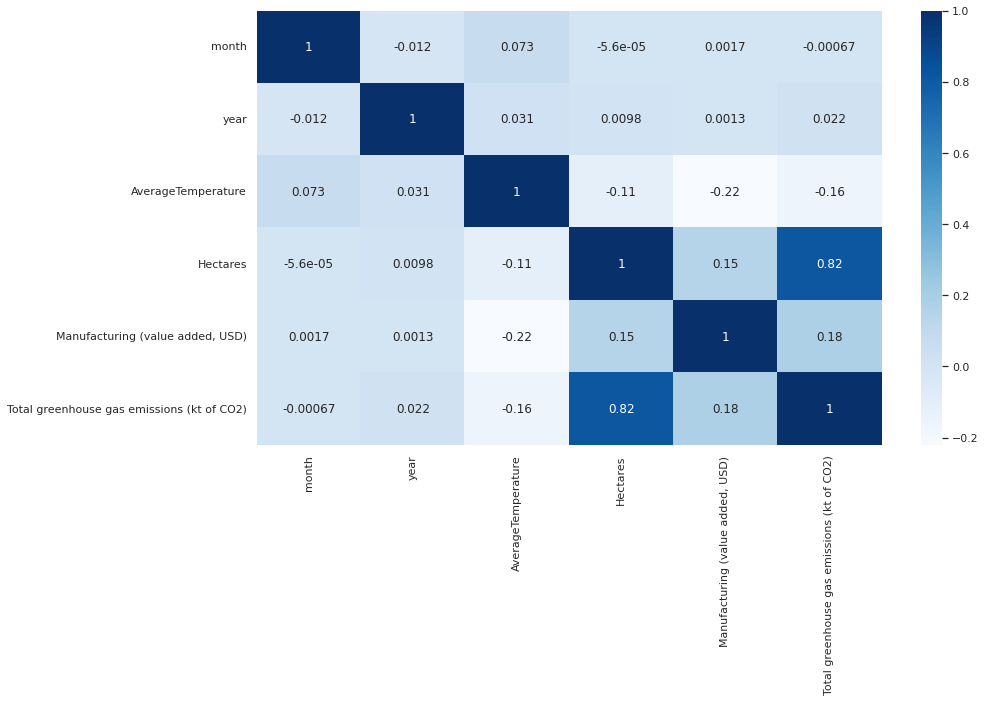

In [ ]:
#correlation heatmap
plt.figure(figsize=(14,8))
corr = full_dataframe.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

# Linear Regression with All 3 Newly Added Features - without PCA

In [ ]:
# one hot encoded
full_dataframe = pd.get_dummies(full_dataframe, columns=['Country'])

In [ ]:
#linear regression

features = full_dataframe.drop(columns=['AverageTemperature'], axis=1)
label = full_dataframe['AverageTemperature']
features

,month,year,Hectares,"Manufacturing (value added, USD)",Total greenhouse gas emissions (kt of CO2),Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,...,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,1,1960,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1960,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1960,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1960,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1960,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99186,4,2013,4.000000e+06,12.919057,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99187,5,2013,4.000000e+06,12.919057,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99188,6,2013,4.000000e+06,12.919057,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
99189,7,2013,4.000000e+06,12.919057,30860.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#predict model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.722266317624038, Test score: 0.7216292195018129


Our train score and test score are similar to the scores in previous sections (above 0.7) and are relatively high as they are over 0.5, so we are not overfitting nor underfitting.

Unfortunately, our test score with all three added features is the lowest thus far, but it still holds some degree of accuracy. The plot below is mostly close between the predictions and actual value. Moreover, the MSE is not much different from the previous MSE's.

In [ ]:
#MSE
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.359417933651552


We observe that in the plot below, the predicted Average Land Temperature and the actual Land Temperature values follow the same trend and thus the predicted temperatures are accurate to an extent. However, the predictions are weaker for lower average temperatures (below 0 degrees), but this may be due to the scarcity and uncertainty of the data--we previously mentioned that these extreme temperatures were recorded in the 1700's. Our actual temperatures have a wide spread, and the predicted temperature consistently lies in the center of the spread, accounting for both extremes.

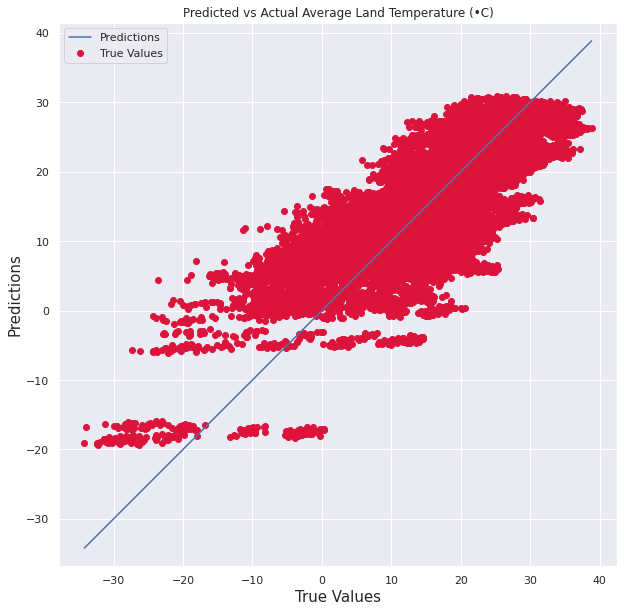

In [ ]:
# Plot the actual vs predicted results
import seaborn as sns

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predicted vs Actual Average Land Temperature (•C)')
plt.legend(['Predictions', 'True Values'])
plt.axis('equal')
plt.show()


# Linear Regression with All 3 Newly Added Features - with PCA 

We attempted to perform PCA to observe if the scores for our linear regression would improve, since we observed that we have two highly correlated features in the heatmap.

In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = StandardScaler().fit_transform(features)

pca = PCA(n_components=159)
X2 = pca.fit_transform(features)

pca.explained_variance_ratio_

array([1.80106215e-02, 1.17621141e-02, 7.21988705e-03, 6.36618796e-03,
       6.33056224e-03, 6.33047275e-03, 6.33047275e-03, 6.33047275e-03,
       6.33047275e-03, 6.33047275e-03, 6.33047275e-03, 6.33047275e-03,
       6.33047275e-03, 6.33047275e-03, 6.33047275e-03, 6.33047275e-03,
       6.33047133e-03, 6.33046562e-03, 6.33043523e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
       6.33040851e-03, 6.33040851e-03, 6.33040851e-03, 6.33040851e-03,
      

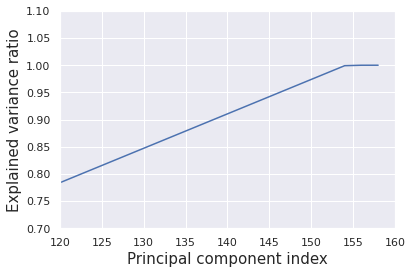

In [ ]:
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)
plt.axis([120, 160, 0.7, 1.1])
plt.xlabel('Principal component index', fontsize=15)
plt.ylabel('Explained variance ratio', fontsize=15)
plt.show()

This shows us that the first 154 components out of 159 gives us around 95% explained variance.

In [ ]:
#define train and test, scale with PCA
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)

pca = PCA(n_components=150)
pca.fit(X_train)
X_train_2 = pca.transform(X_train)

regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

array([[-0.63867214, -0.36922134, -0.19267187, ...,  0.0413088 ,
        -0.15219018, -0.02468739],
       [-0.10509187,  1.17653023, -0.0581549 , ...,  0.08164831,
         0.07586083, -0.12923957],
       [ 0.39899961, -0.16761232,  0.33617403, ...,  0.52267085,
         1.10253185,  0.30360848],
       ...,
       [-0.68404498, -0.56608626, -0.11946306, ..., -0.1243251 ,
        -0.05111065, -0.03758573],
       [-0.91088734, -1.8344487 , -0.22011614, ..., -0.60195182,
        -0.4506008 ,  0.11164583],
       [ 0.88895023, -0.73034721,  1.97685038, ...,  0.14824433,
         0.01005092, -0.15919748]])

In [ ]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)


train_score = regr.score(X_train_2, y_train)
test_score = regr.score(X_test_2, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

Train score: 0.7062695263545942, Test score: 0.7015017878719156


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

In [ ]:
#root mean squared error
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

5.359417933651552


The scores for the linear regression with PCA are low due to the low correlation of the features, as seen in the correlation heatmap in line 241. Most of the features had correlations below 0.5, excluding those in the lower right quadrant. PCA does not work well when our features have low linear correlation. Moreover, since our original dataset was limited, we had to manually add three additional features. PCA is counterintuitive as it reduces the dimensionality of our data. It's likely that we had few redundant and outlying data points. 

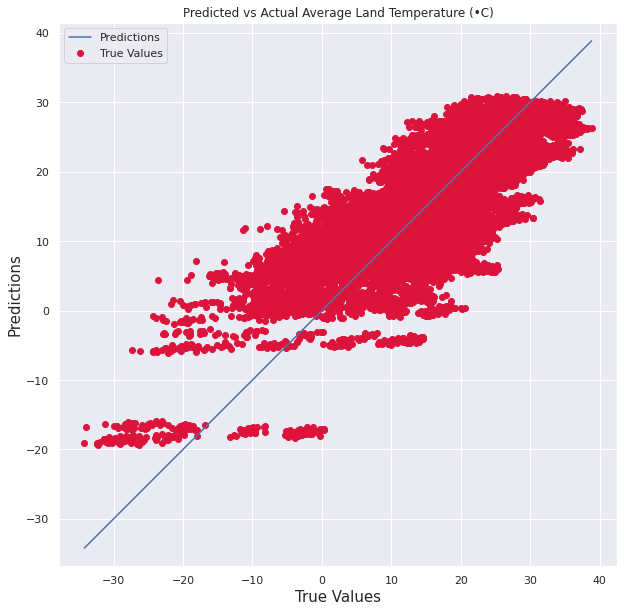

In [ ]:
# Plot the actual vs predicted results
import seaborn as sns

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predicted vs Actual Average Land Temperature (•C)')
plt.legend(['Predictions', 'True Values'])
plt.axis('equal')
plt.show()


# **Machine Learning -- Random Forest Regression**


We will use our full dataframe with all three new features for our random forest regression model without PCA.

Below, we:
*   Do hyperparameter tuning for the number of estimators and the maximum depth of a tree.
*   Plot the predicted vs. actual average temperature using a scatterplot.
* Provide reasoning behind why a random forest regression worked better than linear regression.



In [ ]:
# can directly import for convenience
full_dataframe_rf.to_csv("full_dataframe", index=False)

In [ ]:
full_dataframe_rf

,Country,month,year,AverageTemperature,Hectares,"Manufacturing (value added, USD)",Total greenhouse gas emissions (kt of CO2)
0,Afghanistan,1,1960,2.262,7.815914e+06,12.369202,27689.936088
1,Afghanistan,2,1960,7.008,7.815914e+06,12.369202,27689.936088
2,Afghanistan,3,1960,5.832,7.815914e+06,12.369202,27689.936088
3,Afghanistan,4,1960,12.312,7.815914e+06,12.369202,27689.936088
4,Afghanistan,5,1960,18.853,7.815914e+06,12.369202,27689.936088
...,...,...,...,...,...,...,...
99186,Zimbabwe,4,2013,21.142,4.000000e+06,12.919057,30860.000000
99187,Zimbabwe,5,2013,19.059,4.000000e+06,12.919057,30860.000000
99188,Zimbabwe,6,2013,17.613,4.000000e+06,12.919057,30860.000000
99189,Zimbabwe,7,2013,17.000,4.000000e+06,12.919057,30860.000000


In [ ]:
full_df_dummies = pd.get_dummies(full_dataframe_rf, columns=['Country'])

In [ ]:
full_df_dummies.head(2)

,month,year,AverageTemperature,Hectares,"Manufacturing (value added, USD)",Total greenhouse gas emissions (kt of CO2),Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,...,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
0,1,1960,2.262,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1960,7.008,7.815914e+06,12.369202,27689.936088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train and test
from sklearn.model_selection import train_test_split
X = full_df_dummies.drop(['AverageTemperature'], axis=1)  
y = full_df_dummies['AverageTemperature'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_train

,month,year,Hectares,"Manufacturing (value added, USD)",Total greenhouse gas emissions (kt of CO2),Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bolivia,Country_Botswana,Country_Brazil,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cayman Islands,Country_Central African Republic,Country_Chad,Country_Chile,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,...,Country_Poland,Country_Portugal,Country_Puerto Rico,Country_Qatar,Country_Romania,Country_Rwanda,Country_Samoa,Country_Saudi Arabia,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Singapore,Country_Slovenia,Country_Somalia,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Togo,Country_Tonga,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Vietnam,Country_Zambia,Country_Zimbabwe
759,4,1960,1.273931e+05,11.002241,6985.393559,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84877,2,2005,2.040000e+06,19.077209,89500.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
40379,12,1981,1.556900e+07,13.307119,274923.577000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86462,3,2006,3.450000e+06,9.597696,389510.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32131,8,1977,4.220000e+05,10.927358,13126.538800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,6,1987,1.600000e+04,6.522754,1306.054910,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98047,8,2013,7.678000e+06,16.442019,168630.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5192,9,1962,1.000000e+03,9.759188,427.506967,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
77708,9,2002,2.000000e+03,3.842590,311.114985,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#scale
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y_train = np.array(y_train)

In [ ]:
# print the best params
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [ ]:
parameters = {
    'max_depth': np.arange(10,100,10),
    'n_estimators': np.arange(10,50,10)
}

**Random Forest is a computationally expensive task. Please make sure you set aside sufficient time and are able to run this effectively.**

In [ ]:
rf_cv = GridSearchCV(estimator = rf, param_grid = parameters)

rf_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'n_estimators': array([10, 20, 30, 40])})

In [ ]:
print_best_params(rf_cv)

best_params: {'max_depth': 70, 'n_estimators': 40}



In [ ]:
new_rf = RandomForestRegressor(n_estimators = 40, max_depth = 70)

In [ ]:
new_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, n_estimators=40)

In [ ]:
y_pred = new_rf.predict(X_test)
y_pred
train_score = new_rf.score(X_train, y_train)
test_score = new_rf.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))
# 0.21 without the country one hot encoding

Train score: 0.9978953833324782, Test score: 0.9848922977429819


Our train score and test score are fairly similar and value and are relatively high, so we are not overfitting nor underfitting.

In [ ]:
#root mean squared error
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.2485473297431844


We have an test accuracy of ~0.985 with the best parameters we found during hyperparameter tuning. We also have a lower root mean squared error: ~1.24 compared to 5.36 when doing linear regression without PCA.

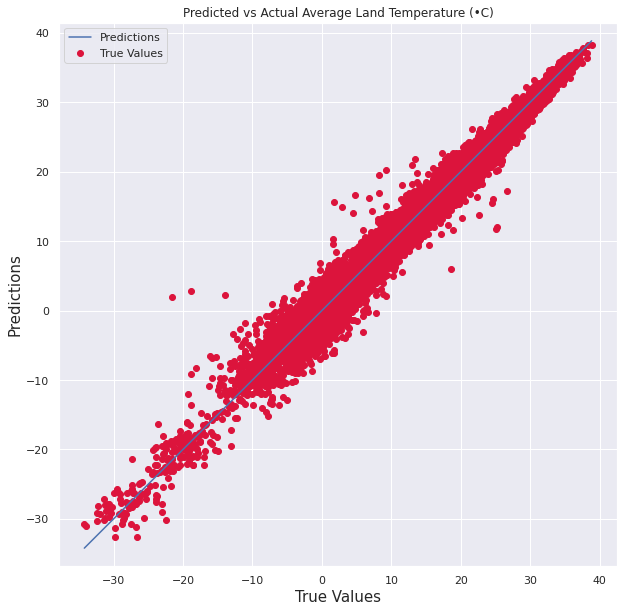

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predicted vs Actual Average Land Temperature (•C)')
plt.legend(['Predictions', 'True Values'])
plt.axis('equal')
plt.show()

Note that compared to the other scatterplot we made, the points are much more concentrated around the linear line, suggesting more accurate predictions.

### Why did random forest regression work well?

Based on the scatterplot of predicted values vs. actual values, it suggests that our data does not have a linear relationship with the target variable, average temperature. Decision trees tend to do better at capturing the non-linearity of the data. Since decision trees tend to overfit, random forests are a great way to prevent overfitting because use an ensemble method (bagging) where each tree is trained over a subset of data (with replacement). 

# **Conclusion**

#Applications for our models

We can use our linear regression model to help determine what climate change policies are necessary to slow the rate of global warming. Countries participating in the annual United Nations Climate Change conferences announce pledges for emission reductions. By collecting data on various countries' targets for greenhouse gas emissions, manufacuturing industry growth, and arable land conservation, we can use these values to predict future land temperature. We can then determine if these current pledges are sufficient or if more drastic actions are needed to curb the increase in average temperature.

One potential limitation with this application is that our data is not perfectly linear with the target variable.


# Challenges

**Clearly**, we have mentioned that our datasets were limited in both quantity of instances and quantity of features. We were sometimes working with datasets containing fewer than 300 rows (especially the country temeprature dataframe), and had to add three additional features to Country, Month, and Year. It was therefore challenging to perform PCA without an insightful indication as to which features to drop, since we only had a few features. The limited scale of our data also prevented us from regularizing with lasso or ridge regression. Overall, the main factor in these limitations is due to working with country-based data, as there are less than 300 countries in the world. 

It is also important to note that we used Pandas for this exploration as we had small datasets, but with larger datasets, Pandas is computationally expensive and not the most efficient option.

# Moving forward

With a more extensive dataset, it would be meaningful to generate temperature predictions based on less explicit but specific features that were related to the ones we added. For instance, rather than manufacturing as a feature, we could use a dataset on the percentage of urban area per city over the years. Even further, we could use the changes in city area over the years as a more specific indicator of construction and deforestation.

We could also explore other methods of inputing values when we have missing data, such as using k-nearest neighbors.

# The sections below were initial attempts that are not part of the analysis!

# **Machine Learning -- Linear and Ridge Regression with a different CO2 dataset**

Below, we:


*   Do linear regression on the average global temperature dataset.
*   Do ridge regresion on the average global temperature dataset due to multicollinearity.
* Join the average global temperature dataset with the average temperature per country dataset to examine if we can extract more features. However, we ultimately did not go forward with this since our dataset became very small in terms of rows after the join.



In [ ]:
global_df_yr.hist(bins=50, figsize=(20,15))
plt.show()

The histograms show us that our average temperature data and year have a right skew, while temperature uncertainty has a left skew. 

In [ ]:
global_df_yr.describe().T

In [ ]:
#correlation heatmap
plt.figure(figsize=(14,8))
corr = global_df_yr.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

In [ ]:
#define features and label
global_df_yr = global_df_yr.dropna(axis = 0)
features = global_df_yr.drop(['LandAverageTemperature'], axis=1)
label = global_df_yr['LandAverageTemperature']

In [ ]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

features = StandardScaler().fit_transform(features)

pca = PCA(n_components=8)
X2 = pca.fit_transform(features)
pca.explained_variance_ratio_

pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

The first 2 components out of 8 gives over 97.5% explained variance.

In [ ]:
#define train and test, scale without PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#create LR model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#make predictions
y_pred = model.predict(X_test)
y_pred
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train score: {}, Test score: {}".format(train_score, test_score))

While this train and test score is high, we are working with features that are highly correlated with the target.

In [ ]:
#root mean squared error
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

The error in our linear regression model is small, particularly since our mean for Land Average Temperature in line103 was 8.36

In [ ]:
#plot predictions vs actual
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

In [ ]:
#define train and test, scale with PCA
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_2 = pca.transform(X_train)

regr = linear_model.LinearRegression()
regr.fit(X_train_2, y_train)

X_train_2

In [ ]:
X_test_2 = pca.transform(X_test)

regr.predict(X_test_2)

regr.score(X_test_2, y_test)

In [ ]:
#root mean squared error
import numpy as np
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test, y_pred)))

The error in our linear regression model is small, particularly since our mean for Land Average Temperature in line103 was 8.36

In [ ]:
#plot predictions vs actual
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig = plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

Using Ridge due to multicollinearity of our features.

In [ ]:
from sklearn.linear_model import Ridge

clf = Ridge()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

print("Score:", clf.score(X_test, y_test))



Since our features to predict the Land Average Temperature were mainly other temperature measurements, we decided to use greenhouse gas emissions instead.

In [ ]:
country_emissions_df = pd.read_csv('/content/greenhouse_gas_files/greenhouse_gas_inventory_data_data.csv')
country_emissions_df

Note that there are only 8406 rows.

In [ ]:
# Find the different categories of greenhouse gas emissions included in the dataset.
emission_categories = country_emissions_df['category'].unique()
emission_categories

In [ ]:
# Convert categories into columns
country_emissions_df = country_emissions_df.groupby(['country_or_area', 'year', 'category']).mean().squeeze().unstack()
country_emissions_df.reset_index()

In [ ]:
joined_temp_emission_df = pd.merge(country_temp_df, country_emissions_df, how='inner', left_on=['Country', 'year'], right_on=['country_or_area', 'year'])
joined_temp_emission_df = joined_temp_emission_df.drop(columns=['index', 'Date', 'AverageTemperatureUncertainty'])
joined_temp_emission_df = joined_temp_emission_df.rename(columns={'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': 'CO2', 
                                                                  'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent': 'GHGS with indirect CO2',
                                                                  'reenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' : 'GHGS',
                                                                  'hydrofluorocarbons_hfcs_emgissions_in_kilotonne_co2_equivalent' : 'HFCS',
                                                                  'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' : 'CH4',
                                                                  'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent' : 'NF3',
                                                                  'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent' : 'N2O',
                                                                  'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent' : 'PCFS',
                                                                  'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent' : 'SF6',
                                                                  'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent' : 'HFCS and PFCS mix'})
joined_temp_emission_df
# DROP DUPLICATES

Note that the earliest data available is 1990, meaning that any data from the earlier part of the 20th century and all of the 18th and 19th cenutry would not be considered when training our model, severely limiting the size of our training data.

In [ ]:
joined_temp_emission_df = joined_temp_emission_df.dropna(subset=['CO2'])
joined_temp_emission_df.drop_duplicates()
joined_temp_emission_df

It appears, based on indexes 0-4 and 11356-11360, that some countries do not have data on certain greenhouse gases, such as Australia not having data on NF3. 

In [ ]:
#correlation heatmap
plt.figure(figsize=(14,8))
corr = joined_temp_emission_df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

In [ ]:
features = joined_temp_emission_df[['CO2']]
label = joined_temp_emission_df['AverageTemperature']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)
scaler = StandardScaler()
# X_train = X_train.reshape(-1, 1) 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
model.score(X_test, y_test)

This accuracy is very low.

In [ ]:
joined_temp_emission_df.dropna()

If we were to drop rows that had any null values, we would only end up with 284 rows. Similarly, if we selected a combination of greenhouse gases, we would already limit our training data. Thus, instead of working with this datset from the United Nations, we used data from the World Bank that had data from years earlier than 1990.